### Import dependencies:

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### EDA:

In [76]:
df_deliveries = pd.read_csv('deliveries.csv')
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [77]:
print(df_deliveries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [78]:
#Checking null values for deliveries.csv
df_deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [79]:
#Replacing null values with NA
df_deliveries= df_deliveries.fillna('NA')
df_deliveries.isna().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

## Batsman analysis:

<AxesSubplot:>

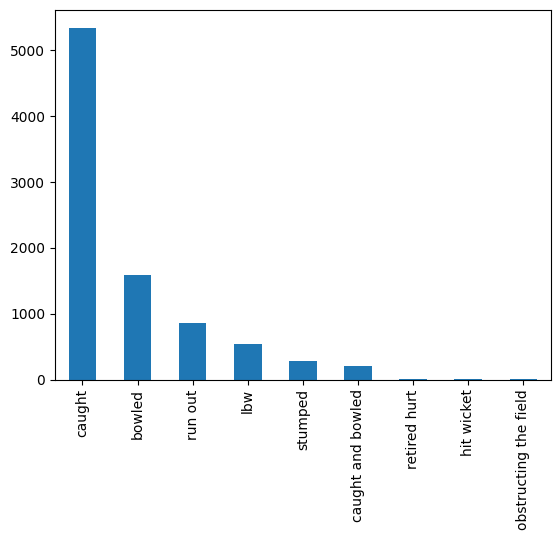

In [80]:
df_del2=df_deliveries.loc[(df_deliveries['dismissal_kind']!='NA'), :]
df_del2['dismissal_kind'].value_counts()[:20].plot(kind='bar')

>**Caught** is the most common dismissal type in the IPL followed by Bowled. There are very few instances of  retired hurt, hit wicket and obstructing the field, **'Obstructing the field'** being the least common mode of dismissal. 

<AxesSubplot:>

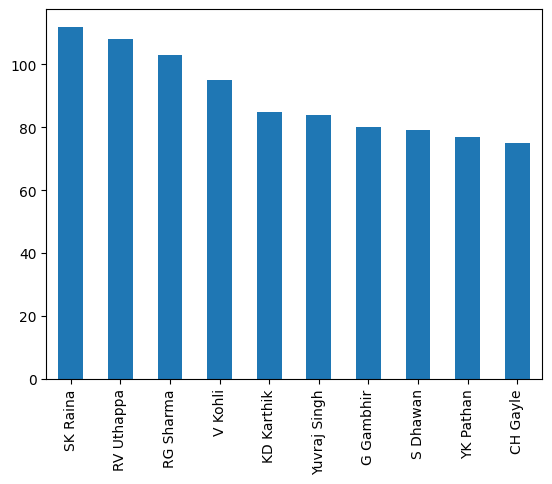

In [81]:
#Viewing how many times a batsman has been dismissed by a catch
caught=df_deliveries.loc[df_deliveries['dismissal_kind'] == 'caught']
caught['batsman'].value_counts()[:10].plot(kind='bar')

Raina has been dismissed the most number times due to the 'caught' mode of dismissal followed closed by Uthappa.

<AxesSubplot:>

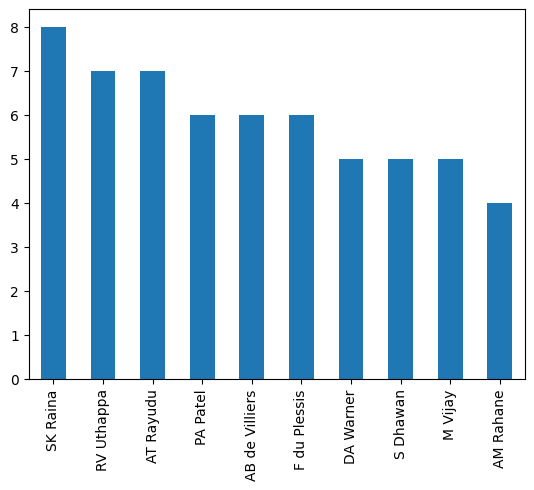

In [82]:
#Viewing how many times a batsman has been dismissed by stumping
caught=df_deliveries.loc[df_deliveries['dismissal_kind'] == 'stumped']
caught['batsman'].value_counts()[:10].plot(kind='bar')

Just like 'caught', Raina has been dismissed the most number times due to the 'stumping' too followed closed by Uthappa here as well.

In [83]:
# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

Let us see the ones with the most number of IPL runs under their belt.

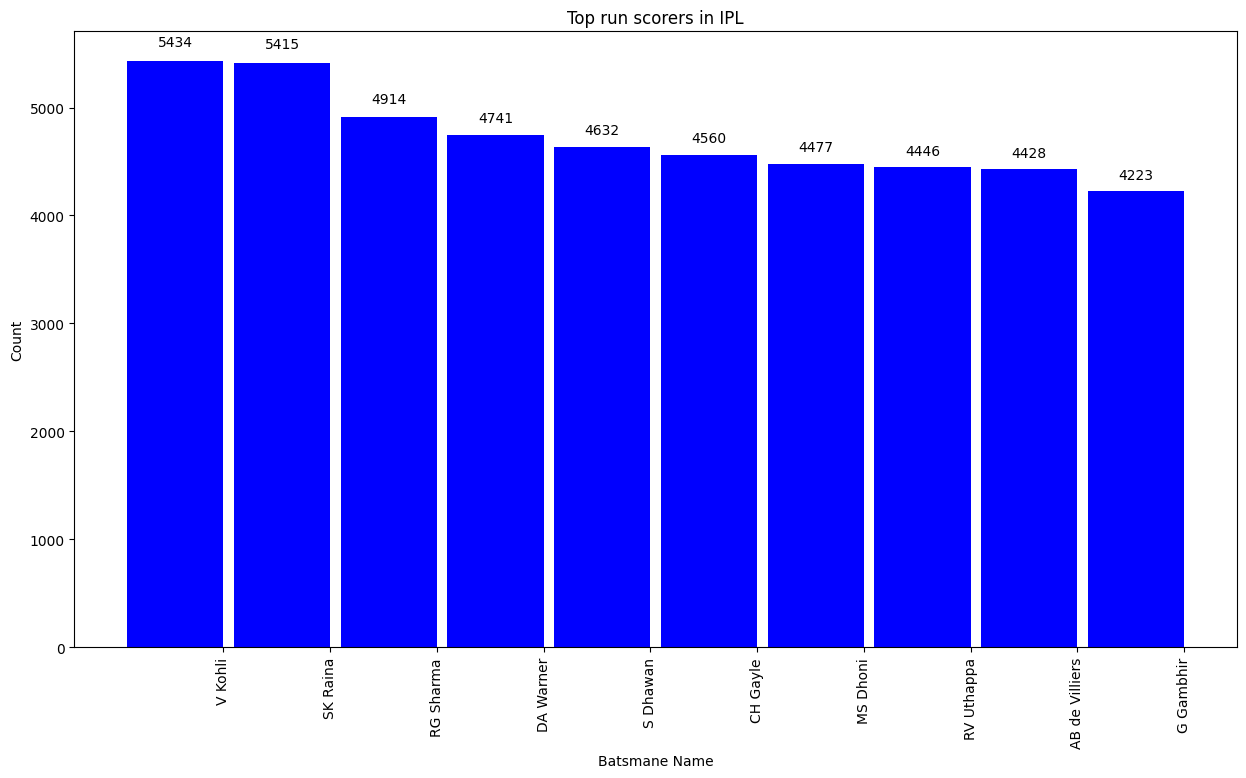

In [84]:
temp_df = df_deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

> **Raina** is leading the chart followed closely by Kohli. Warner is the top scorer among foreign players. The stats-> starting to make sense as Raina, Uthappa and some others who featured in the list of most dismissals via caught and stumping feature in the most runs too indicating that they might have also faced the most number of deliveries. 

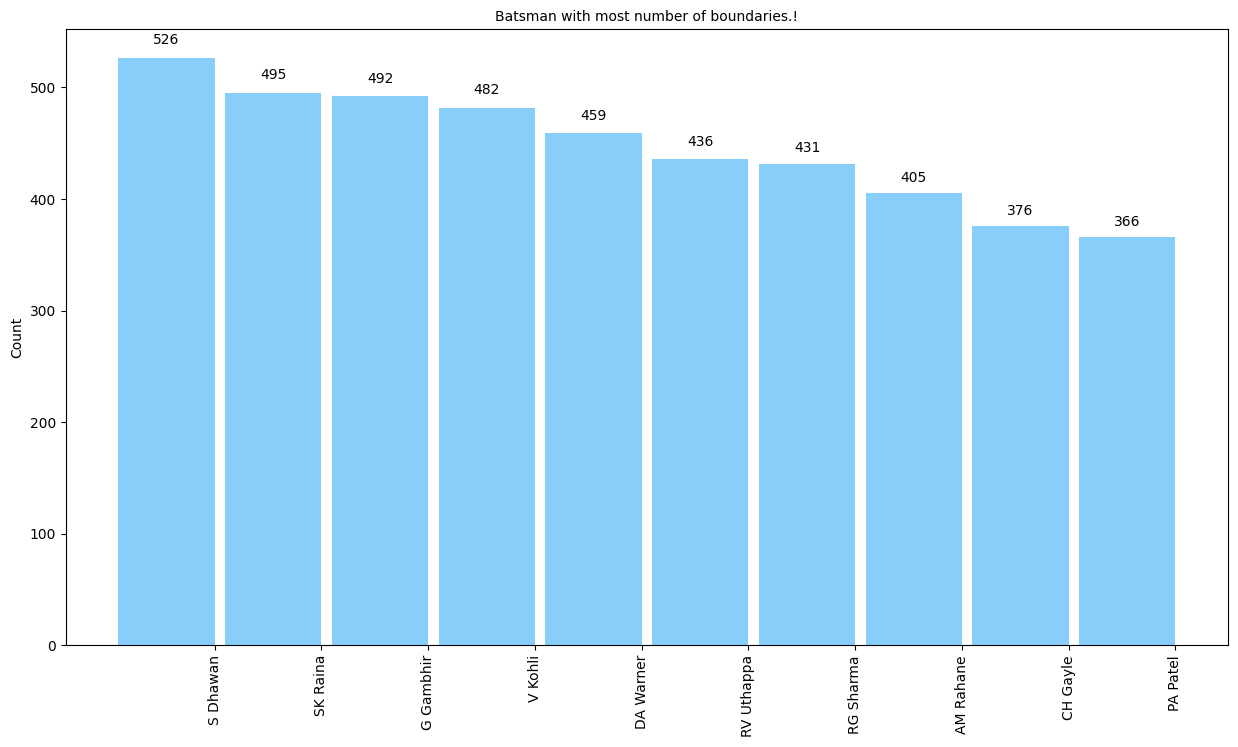

In [85]:
# Now let us see the players with more number of boundaries in IPL.
temp_df = df_deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
autolabel(rects)
plt.show()

> **Gambhir** is well ahead of others - almost 80 boundaries more than the second best **Raina**.

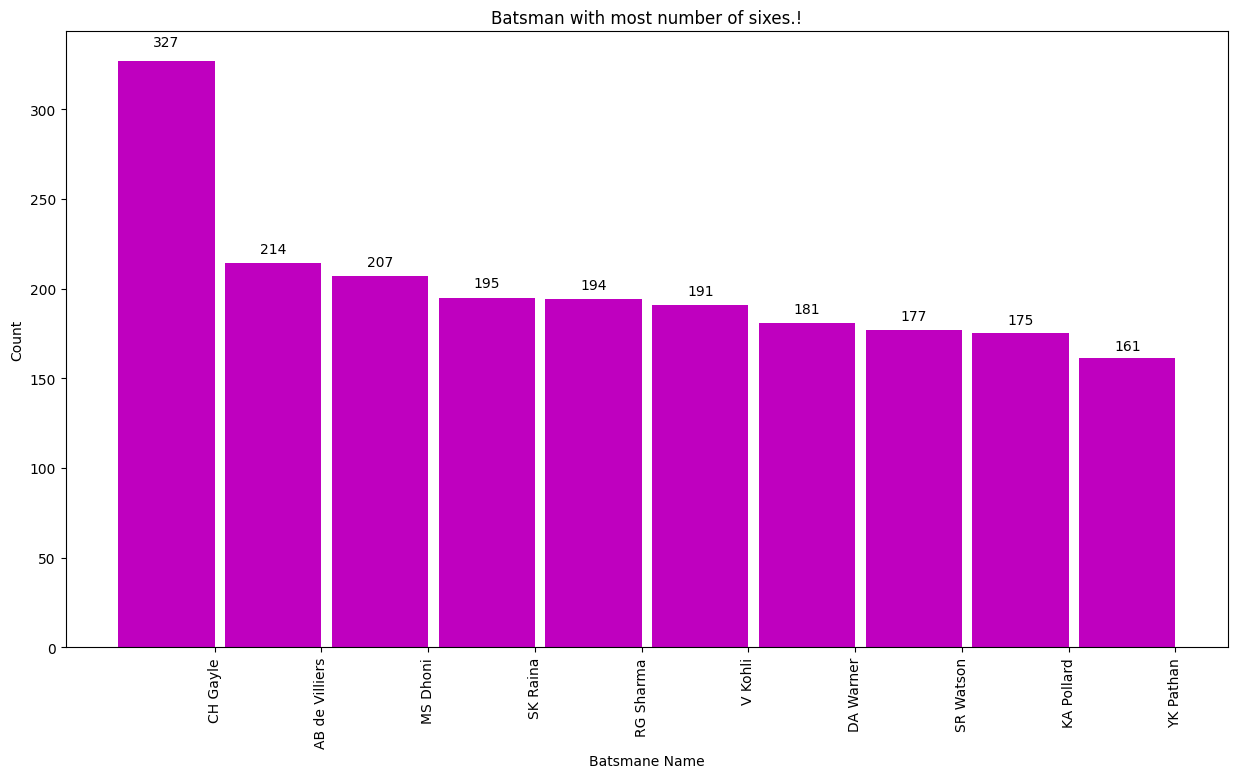

In [86]:
# Now let us check the number of 6's
temp_df = df_deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

>There you see the big man. **Gayle**, the unassailable leader in the number of sixes.

>**Raina** is second in both number of 4's and 6's

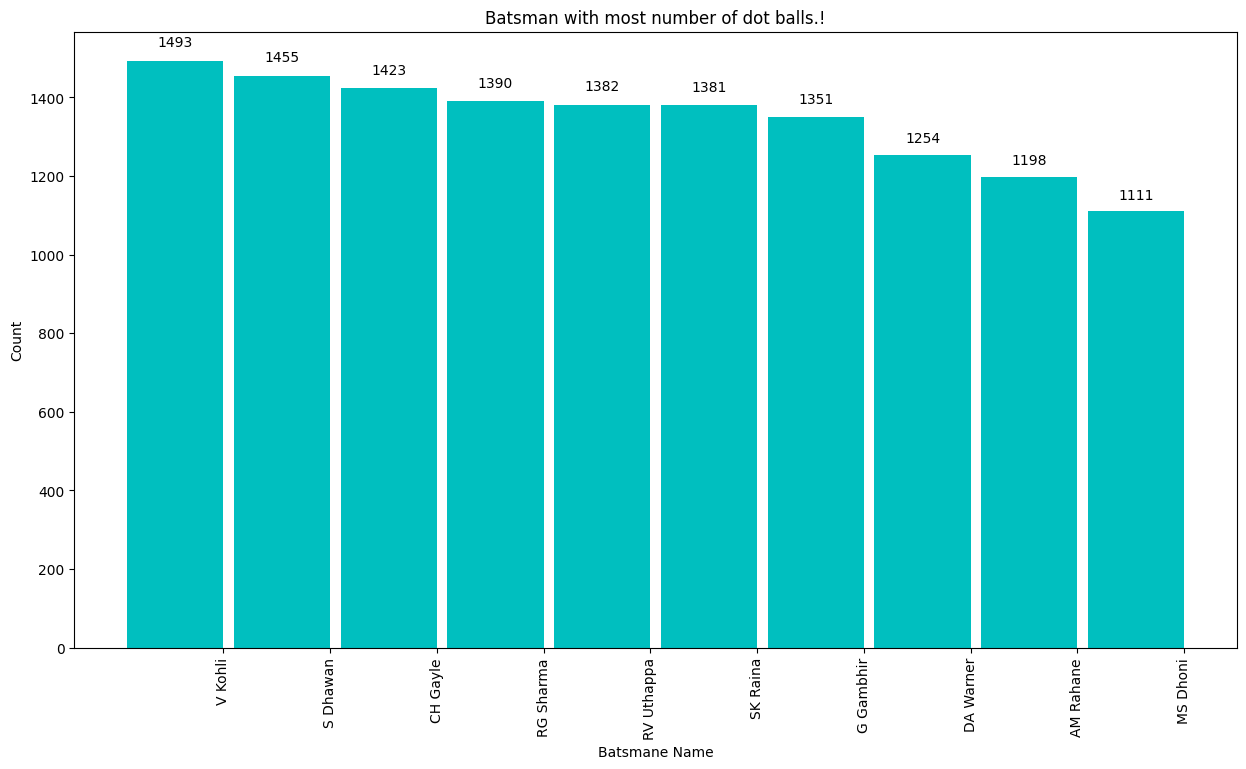

In [87]:
# Now let us see the batsman who has played the most number of dot balls.
temp_df = df_deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

>It is interesting to see that the same names repeat again here as well. Indication-> since these guys have played more number of balls, they have more dot balls as well, and more runs too.

C:\Users\Nihal Chengappa\AppData\Local\Temp\ipykernel_18972\3528660176.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=False)


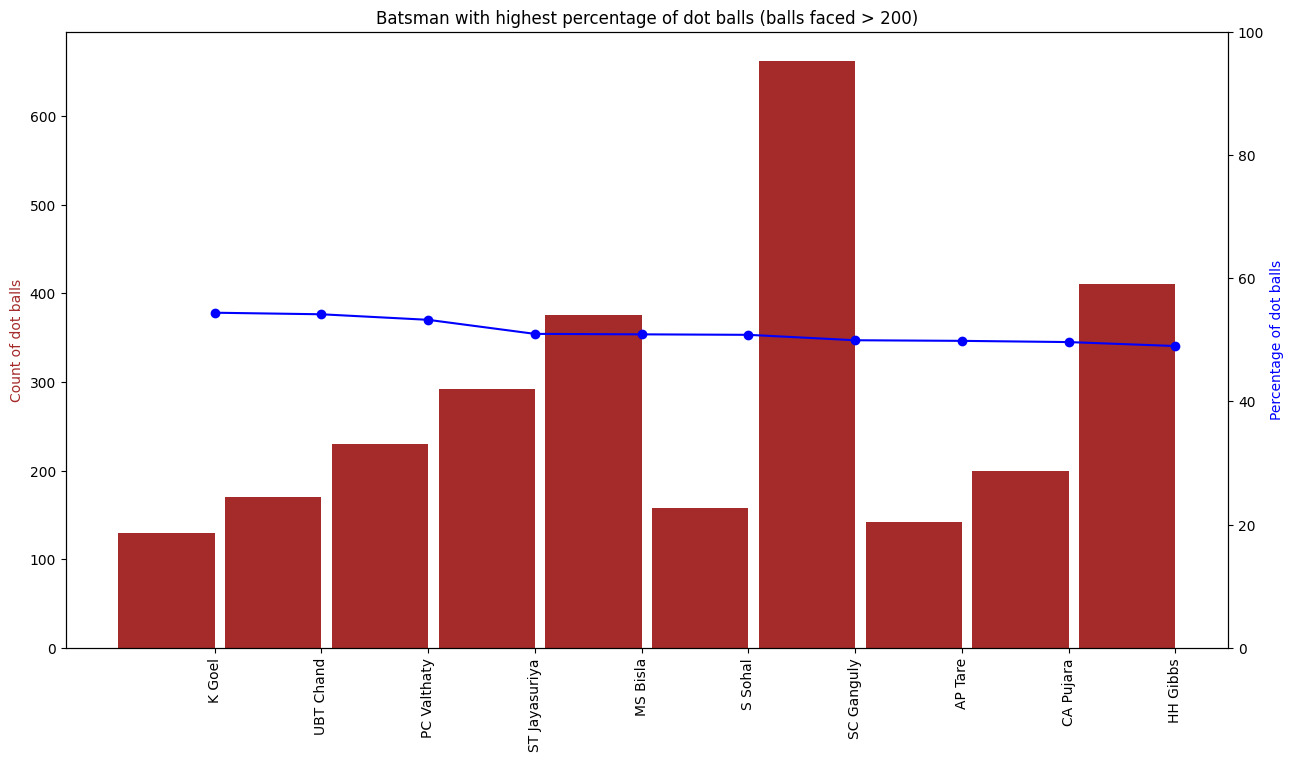

In [88]:
# Let us check the percentage distribution now.
def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x==0).sum()

temp_df = df_deliveries.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
temp_df = temp_df.loc[temp_df.balls_faced>200,:]
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

fig, ax1 = plt.subplots(figsize=(15,8))
ax2 = ax1.twinx()
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
rects = ax1.bar(ind, np.array(temp_df['dot_balls']), width=width, color='brown')
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Count of dot balls", color='brown')
ax1.set_title("Batsman with highest percentage of dot balls (balls faced > 200)")
ax2.plot(ind+0.45, np.array(temp_df['percentage_of_dot_balls']), color='b', marker='o')
ax2.set_ylabel("Percentage of dot balls", color='b')
ax2.set_ylim([0,100])
ax2.grid(b=False)
plt.show()

>Batsman with more than 200 balls faced is taken into cnosideration and the ones with higher percentage of dot balls are seen. It is interesting to see Ganguly with more than 600 balls and more than 90% of them are dot balls. It is surprising to see names like **Jayasuriya** and **Gibbs** in there since they are generally really fast strikers but this is where stats help us in showing what actually happens and not what actually seems to happen.

## Bowler Analysis

Now let us see the bowlers who have bowled the most number of balls in IPL.

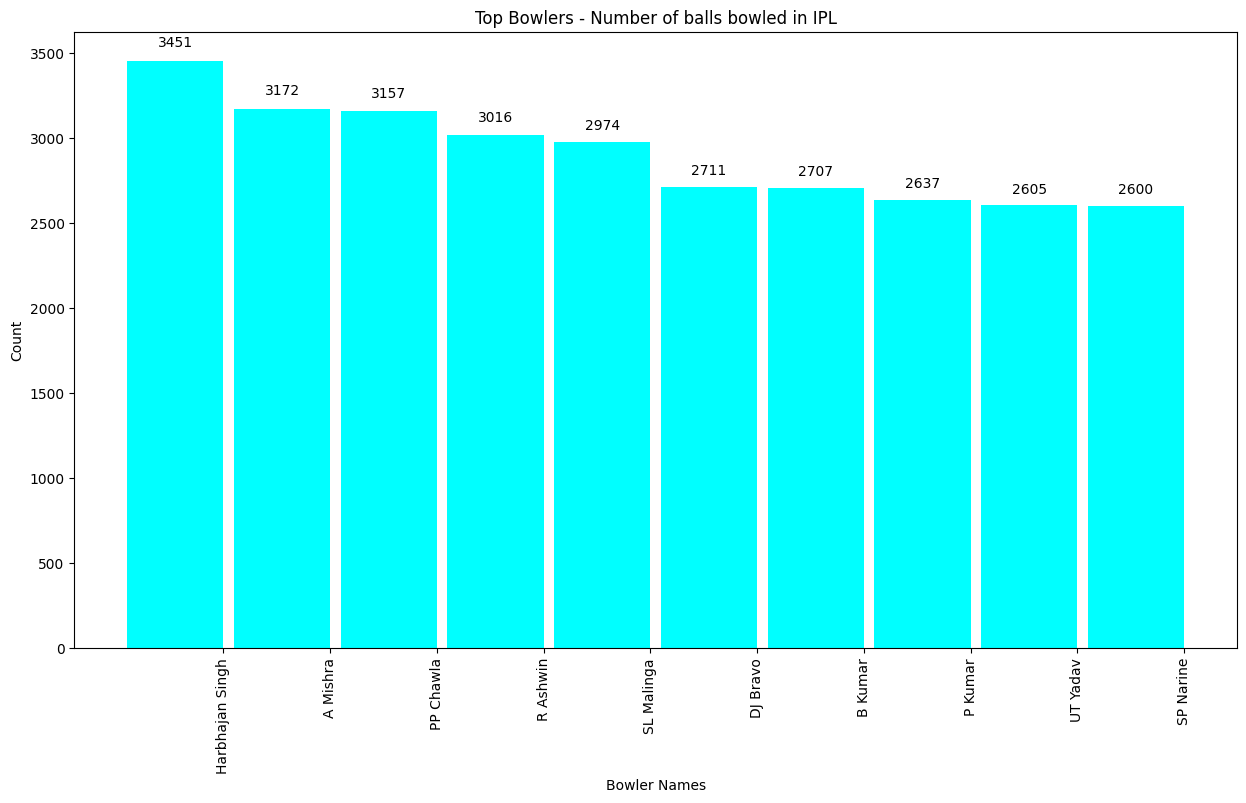

In [89]:
temp_df = df_deliveries.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

>**Harbhajan Singh** is the the bowler with most number of balls bowled in IPL matches. Now let us see the bowler with more number of dot balls.

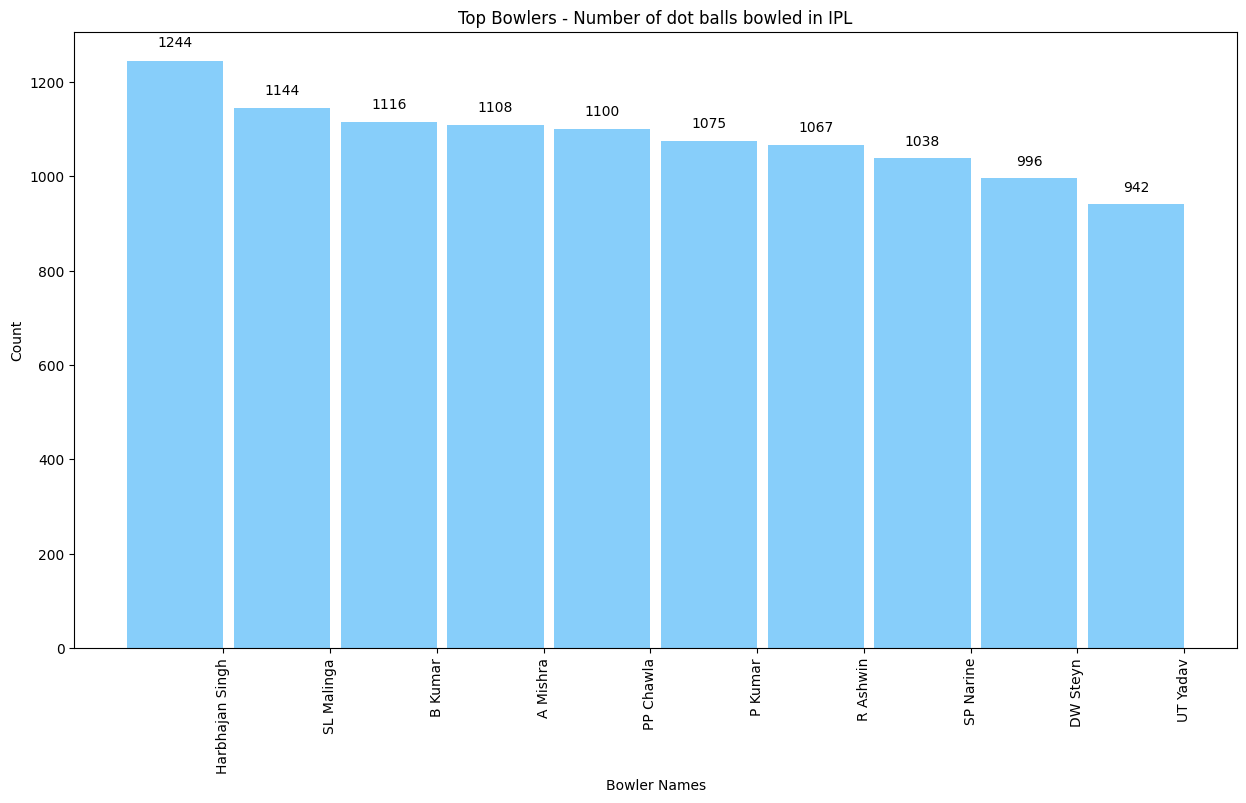

In [90]:
temp_df = df_deliveries.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

>**Pravin Kumar** is the one with more number of dot balls followed by **Harbhajan and Malinga**

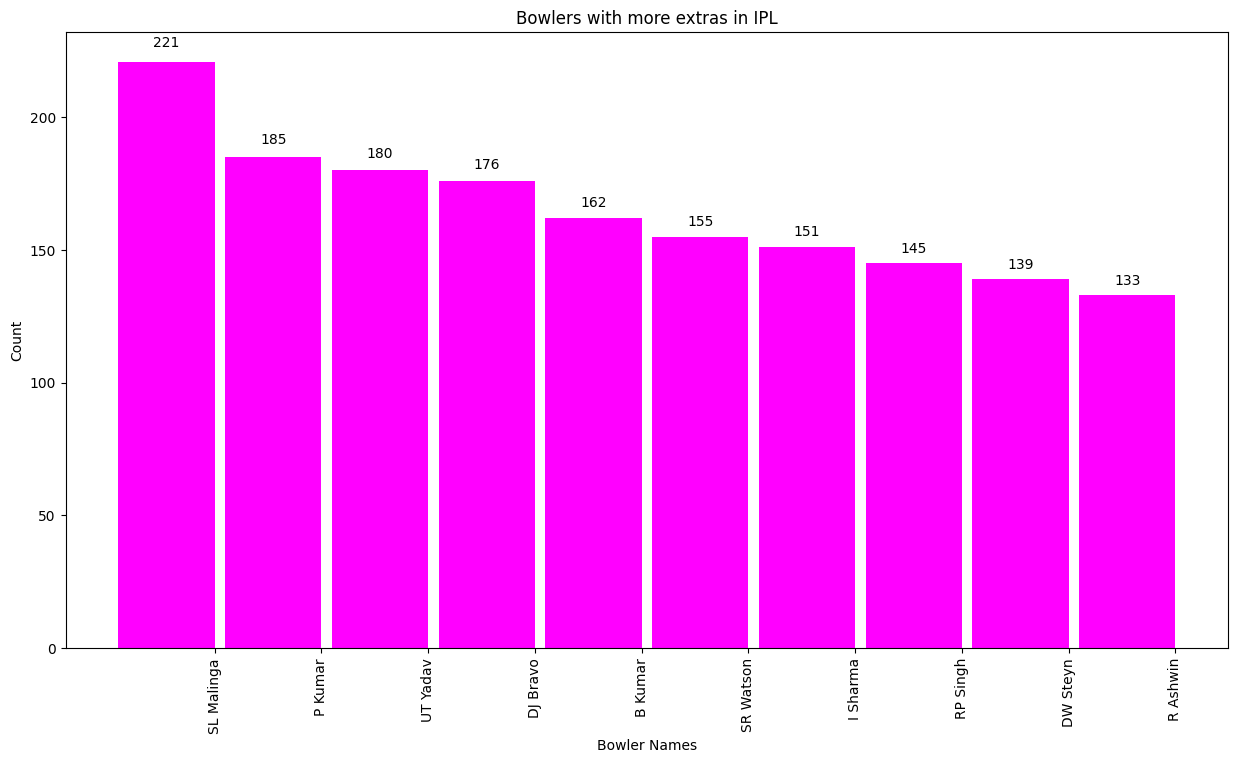

In [91]:
# Now let us see the bowlers who has bowled more number of extras in IPL.
temp_df = df_deliveries.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='magenta')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from collections import OrderedDict
import os

In [93]:
balldf = pd.read_csv("deliveries.csv")
# Group details on batsmen
batgroup = balldf.groupby(['batsman'])
# Create a batting dataframe with a summary statistics for each batsman
batdf = pd.DataFrame(batgroup['ball'].count()).rename(columns={'ball':'balls_faced'})
batdf['innings'] = batgroup['match_id'].nunique()
batdf['runs'] = batgroup['batsman_runs'].sum()
batdf['4s'] = balldf[balldf['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count()
batdf['4s'].fillna(0,inplace=True)
batdf['6s'] = balldf[balldf['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count()
batdf['6s'].fillna(0,inplace=True)
# Batting average = total rus scored/no. of times batsman is been dismissed
# Approximated here to matches instead of no. of dismissals
batdf['AVG'] = round(batdf['runs']/batdf['innings'],2)
# Strike Rate = (Runs Scored / Balls faced) * 100
batdf['SR'] = round(batdf['runs']/batdf['balls_faced']*100,2)

In [94]:
batdf['match_runs'] = balldf.groupby('match_id').tail(5).groupby('batsman').sum()['batsman_runs'] / 5
batdf['match_runs'].fillna(0,inplace=True)
print(batdf)

                balls_faced  innings  runs     4s     6s    AVG      SR  \
batsman                                                                   
A Ashish Reddy          196       23   280   16.0   15.0  12.17  142.86   
A Chandila                7        2     4    0.0    0.0   2.00   57.14   
A Chopra                 75        6    53    7.0    0.0   8.83   70.67   
A Choudhary              20        3    25    1.0    1.0   8.33  125.00   
A Dananjaya               5        1     4    0.0    0.0   4.00   80.00   
...                     ...      ...   ...    ...    ...    ...     ...   
YV Takawale             183       10   192   26.0    3.0  19.20  104.92   
Yashpal Singh            67        4    47    5.0    0.0  11.75   70.15   
Younis Khan               7        1     3    0.0    0.0   3.00   42.86   
Yuvraj Singh           2207      126  2765  218.0  149.0  21.94  125.28   
Z Khan                  141       27   117   11.0    2.0   4.33   82.98   

                match_ru

In [95]:
# 100s
g = balldf.groupby(['batsman', "match_id"]).sum()['batsman_runs'].reset_index()
batdf['100s'] = g[g['batsman_runs'] > 100].groupby('batsman')['batsman_runs'].count()
batdf['100s'].fillna(0,inplace=True)
# 50s
g = balldf.groupby(['batsman', "match_id"]).sum()['batsman_runs'].reset_index()
batdf['50s'] = g[g['batsman_runs'] > 50].groupby('batsman')['batsman_runs'].count()
batdf['50s'].fillna(0,inplace=True)
print(g)
print(batdf['innings'].mean())
batdf.sample(n=5)

              batsman  match_id  batsman_runs
0      A Ashish Reddy       346            10
1      A Ashish Reddy       352             3
2      A Ashish Reddy       359             8
3      A Ashish Reddy       373            10
4      A Ashish Reddy       376             4
...               ...       ...           ...
11289          Z Khan       462             0
11290          Z Khan       470             7
11291          Z Khan       477             1
11292          Z Khan       578             4
11293          Z Khan       623             2

[11294 rows x 3 columns]
21.887596899224807


,balls_faced,innings,runs,4s,6s,AVG,SR,match_runs,100s,50s
batsman,,,,,,,,,,
SB Styris,134,10,131,10.0,3.0,13.10,97.76,0.0,0.0,0.0
RJ Quiney,105,7,103,12.0,3.0,14.71,98.10,0.0,0.0,1.0
Sunny Gupta,1,1,0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
BR Dunk,36,3,40,7.0,0.0,13.33,111.11,0.0,0.0,0.0
NJ Maddinson,21,3,20,4.0,0.0,6.67,95.24,0.0,0.0,0.0


In [96]:
batdf = batdf[batdf['innings'] > batdf['innings'].mean()]

In [97]:
batdf.sample(n=5)

,balls_faced,innings,runs,4s,6s,AVG,SR,match_runs,100s,50s
batsman,,,,,,,,,,
AC Gilchrist,1555,80,2069,239.0,92.0,25.86,133.05,0.6,2.0,12.0
CJ Anderson,436,29,538,40.0,31.0,18.55,123.39,2.8,0.0,2.0
CA Pujara,403,22,390,50.0,4.0,17.73,96.77,0.4,0.0,1.0
DT Christian,384,34,448,22.0,19.0,13.18,116.67,5.0,0.0,0.0
CA Lynn,939,41,1308,128.0,62.0,31.90,139.30,2.8,0.0,9.0


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# 'balls_faced','innings','runs','4s','6s','AVG', 'SR','100s','50s'
x = batdf.drop('match_runs',axis=1)
print(x.info())
# runs
y = batdf['match_runs']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 74)
lr = LinearRegression()
lr.fit(x_train.values, y_train)

# Fetching intercept and coefficient
print("Intercept:", lr.intercept_)
print("Coefficients:",lr.coef_)

y_prediction = lr.predict(x_test)
score = r2_score(y_test, y_prediction)
print('r2 score is: ', score)
print('mean_sqrd_error is: ', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is: ', np.sqrt(mean_squared_error(y_test,y_prediction)))

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, A Ashish Reddy to Z Khan
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   balls_faced  138 non-null    int64  
 1   innings      138 non-null    int64  
 2   runs         138 non-null    int64  
 3   4s           138 non-null    float64
 4   6s           138 non-null    float64
 5   AVG          138 non-null    float64
 6   SR           138 non-null    float64
 7   100s         138 non-null    float64
 8   50s          138 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 10.8+ KB
None
Intercept: 1.6296378665035558
Coefficients: [-0.01638576  0.19364798  0.02505795 -0.13135091 -0.08711329  0.02520028
 -0.02804786  0.31681601  0.07701636]
r2 score is:  0.39018109348091157
mean_sqrd_error is:  13.358269826557732
root_mean_squared error of is:  3.6548966916395504


c:\Users\Nihal Chengappa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [99]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators = 100, random_state = 102)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)
model1.fit(x_train.values, y_train)  
Y_pred = model1.predict(x_test) 
print('mean_sqrd_error is: ', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is: ', np.sqrt(mean_squared_error(y_test,y_prediction)))

mean_sqrd_error is:  47.819812706137995
root_mean_squared error of is:  6.915187105649275


c:\Users\Nihal Chengappa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [100]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[13:34:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 5.395442


In [101]:
print(batdf.loc[['RV Uthappa']])

            balls_faced  innings  runs     4s     6s    AVG      SR  \
batsman                                                               
RV Uthappa         3492      170  4446  436.0  156.0  26.15  127.32   

            match_runs  100s   50s  
batsman                             
RV Uthappa        11.8   0.0  23.0  


In [102]:
def predict_batsman(batsmanList): 
    #Dictionary to maintain batsman and his corresponding predicted runs
    batsman_score={}
    # Loop through list of Batsman
    for i in batsmanList:
        #Prediction per player
        pred = lr.predict(x.loc[[i]].values.tolist())
        batsman_score[i]=pred
    #Finding top players
    top = sorted(batsman_score, key=batsman_score.get, reverse=True)[:]
    print(batsman_score)
    print(top)
    # batsman_score = OrderedDict(sorted(batsman_score.items()))
    scores = list(batsman_score.values())
    scores = list(map(lambda x: x[0], scores))
    fig = plt.figure(figsize = (10, 5))
    plt.bar(top,sorted(scores,reverse=True),
        width = 0.4)
    plt.xticks(rotation=90)
    plt.xlabel("Player Names")
    plt.ylabel("Predicted scores")
    plt.title("Batsman runs prediction")
    plt.show()


{'SK Raina': array([25.54112925]), 'V Kohli': array([22.94689131]), 'RV Uthappa': array([16.73902981]), 'Yuvraj Singh': array([15.50003337]), 'PA Patel': array([5.82809201]), 'R Dravid': array([1.12032715]), 'G Gambhir': array([9.14463091]), 'KD Karthik': array([20.85815222]), 'RG Sharma': array([23.81810597]), 'V Sehwag': array([5.41636842]), 'SR Watson': array([13.33857636]), 'IK Pathan': array([12.47199866])}
['SK Raina', 'RG Sharma', 'V Kohli', 'KD Karthik', 'RV Uthappa', 'Yuvraj Singh', 'SR Watson', 'IK Pathan', 'G Gambhir', 'PA Patel', 'V Sehwag', 'R Dravid']


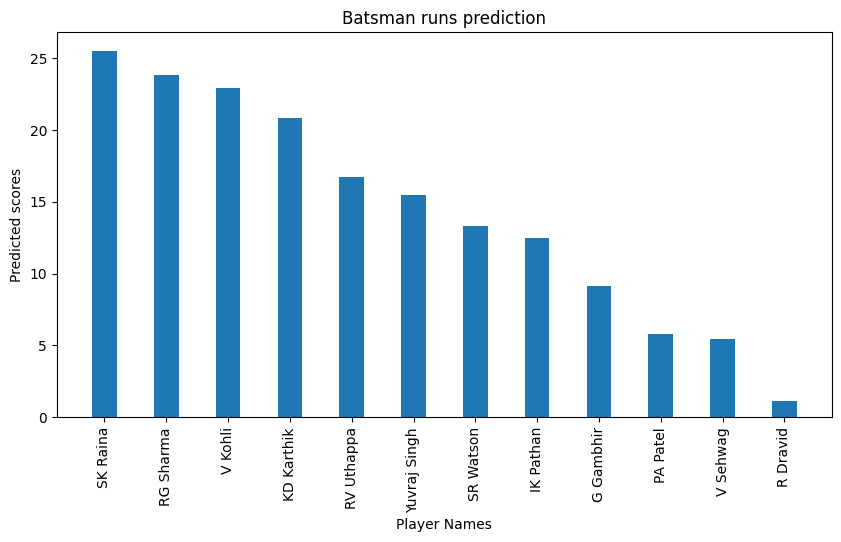

In [103]:
predict_batsman(['SK Raina','V Kohli','RV Uthappa','Yuvraj Singh','PA Patel','R Dravid','G Gambhir','KD Karthik','RG Sharma','V Sehwag','SR Watson','IK Pathan'])

In [104]:
# Group details on bowler
bowlgroup = balldf.groupby(['bowler'])

# Create a bowling dataframe (bowldf) with a summary statistics for each batsman
bowldf = pd.DataFrame(bowlgroup['ball'].count()).rename(columns={'ball':'balls_bowled'})

# Get no. of wickets taken by each bowler
bwl_wkts = balldf[balldf['dismissal_kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowldf['wickets'] = bwl_wkts.groupby(['bowler'])['ball'].count()
bowldf['wickets'].fillna(0,inplace=True)
 
# Calculate the total no. of overs bowled
overs = pd.DataFrame(balldf.groupby(['bowler','match_id'])['over'].nunique())
bowldf['overs'] = overs.groupby(['bowler'])['over'].sum()    

# Calculate the runs conceded
bowldf['runs_conceded'] = balldf.groupby('bowler')['batsman_runs'].sum()
bowldf['runs_conceded'] = bowldf['runs_conceded'].fillna(0)
# Add the runs conceded through wide and noball
bowldf['runs_conceded'] = bowldf['runs_conceded'].add(balldf.groupby('bowler')['extra_runs'].sum(),fill_value=0)
# Bowler econ rate
bowldf['bowl_econ'] = round(bowldf['runs_conceded']/bowldf['overs'],2)
bowldf.sample(n=5)

,balls_bowled,wickets,overs,runs_conceded,bowl_econ
bowler,,,,,
S Lamichhane,211,13.0,35,303,8.66
CR Woakes,396,25.0,63,603,9.57
P Krishna,437,14.0,69,685,9.93
B Kumar,2707,133.0,439,3264,7.44
J Searles,45,2.0,7,92,13.14


In [105]:
bowldf = bowldf[bowldf['overs'] > bowldf['overs'].mean()]
bowldf.sample(n=5)

,balls_bowled,wickets,overs,runs_conceded,bowl_econ
bowler,,,,,
Mohammed Shami,1075,40.0,173,1599,9.24
RP Singh,1874,90.0,299,2417,8.08
JP Faulkner,1287,61.0,209,1849,8.85
A Singh,551,31.0,90,769,8.54
M Kartik,1182,31.0,192,1418,7.39


In [106]:
overs = pd.DataFrame(balldf.groupby(['bowler','match_id'])['over'].nunique())
overs = overs.groupby(['bowler'])['over'].tail(5)
print(overs)

# total runs in last 5 matches
bowlermatch = pd.DataFrame(balldf.groupby(['bowler','match_id'])['total_runs'].sum())
bowlermatch = bowlermatch.groupby('bowler')['total_runs'].tail(5)
print(bowlermatch)
result = pd.concat([bowlermatch, overs], axis=1, join='inner')
print(result)
result['bowl_econ'] = round(result['total_runs'] / result['over'], 2)
bowldf['recent_economy'] = result.groupby('bowler')['bowl_econ'].mean()

bowler          match_id
A Ashish Reddy  529         1
                531         2
                551         2
                580         2
                584         2
                           ..
Z Khan          612         3
                623         4
                625         3
                628         4
                632         4
Name: over, Length: 1672, dtype: int64
bowler          match_id
A Ashish Reddy  529          5
                531         16
                551         19
                580         26
                584         14
                            ..
Z Khan          612         25
                623         27
                625         19
                628         26
                632         30
Name: total_runs, Length: 1672, dtype: int64
                         total_runs  over
bowler         match_id                  
A Ashish Reddy 529                5     1
               531               16     2
               551         

In [107]:
print(bowldf['overs'].mean())
bowldf = bowldf[bowldf['overs'] > 100]
print(bowldf.info())
print(bowldf.sample(5))

202.64864864864865
<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, A Kumble to Z Khan
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   balls_bowled    85 non-null     int64  
 1   wickets         85 non-null     float64
 2   overs           85 non-null     int64  
 3   runs_conceded   85 non-null     int64  
 4   bowl_econ       85 non-null     float64
 5   recent_economy  85 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 4.6+ KB
None
                 balls_bowled  wickets  overs  runs_conceded  bowl_econ  \
bowler                                                                    
JH Kallis                1799     65.0    291           2348       8.07   
Harbhajan Singh          3451    150.0    563           4050       7.19   
YK Pathan                1184     42.0    193           1443       7.48   
VR Aaron                  978     42.0    155           1392       8.98   
SB Jaka

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
x = bowldf.drop('recent_economy',axis=1)
print(x.head())
# recent_economy
y = bowldf['recent_economy']
# 69
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 69)
lr = LinearRegression()
lr.fit(x_train.values, y_train)

# Fetching intercept and coefficient
print("Intercept:", lr.intercept_)
print("Coefficients:",lr.coef_)

y_prediction = lr.predict(x_test)
score = r2_score(y_test, y_prediction)
print('r2 score is: ', score)
print('mean_sqrd_error is: ', mean_squared_error(y_test, y_prediction))
print('root_mean_squared error of is: ', np.sqrt(mean_squared_error(y_test, y_prediction)))

            balls_bowled  wickets  overs  runs_conceded  bowl_econ
bowler                                                            
A Kumble             983     45.0    163           1089       6.68
A Mishra            3172    156.0    519           3850       7.42
A Nehra             1974    106.0    320           2537       7.93
AB Agarkar           820     29.0    131           1174       8.96
AB Dinda            1589     69.0    255           2103       8.25
Intercept: 3.3724846296078086
Coefficients: [ 1.92146709e-02 -1.94980025e-03 -1.17682538e-01 -9.72234864e-05
  7.22695748e-01]
r2 score is:  0.14565283824571662
mean_sqrd_error is:  3.1246780284701186
root_mean_squared error of is:  1.7676758833197104


c:\Users\Nihal Chengappa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [109]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 6)
model2 = RandomForestRegressor(n_estimators = 100, random_state = 102)
model2.fit(x_train.values, y_train)  
Y_pred = model2.predict(x_test) 
print('mean_sqrd_error is: ', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is: ', np.sqrt(mean_squared_error(y_test,y_prediction)))

mean_sqrd_error is:  3.627131767774085
root_mean_squared error of is:  1.9045030238290737


c:\Users\Nihal Chengappa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [110]:
def predict_bowler(bowlerList): 
    #Dictionary to maintain bowler and his predicted economy
    bowler_score={}
    # Loop through list of Bowler
    for i in bowlerList:
        #Prediction per player
        pred = lr.predict(x.loc[[i]].values.tolist())
        bowler_score[i]=pred
    #Finding top players
    top = sorted(bowler_score, key=bowler_score.get,reverse=True)[:]
    print(bowler_score)
    print(top)
    economy = list(bowler_score.values())
    scores = list(map(lambda x: x[0], economy))
    fig = plt.figure(figsize = (12, 5))
    plt.bar(top, sorted(scores,reverse=True),
        width = 0.4)
    plt.xticks(rotation=90)
    plt.xlabel("Bowler Names")
    plt.ylabel("Predicted economy")
    plt.title("Bowler economy prediction")
    plt.show()

{'SK Raina': array([8.15366637]), 'Yuvraj Singh': array([8.36757716]), 'SR Watson': array([9.68980214]), 'P Kumar': array([9.33861527]), 'R Ashwin': array([8.21204265]), 'IK Pathan': array([8.63344033]), 'A Mishra': array([7.9281067]), 'AB Agarkar': array([10.01677161]), 'AB Dinda': array([9.51879221]), 'AD Mathews': array([9.01562817]), 'AD Russell': array([9.65532319]), 'B Kumar': array([8.52416006])}
['AB Agarkar', 'SR Watson', 'AD Russell', 'AB Dinda', 'P Kumar', 'AD Mathews', 'IK Pathan', 'B Kumar', 'Yuvraj Singh', 'R Ashwin', 'SK Raina', 'A Mishra']


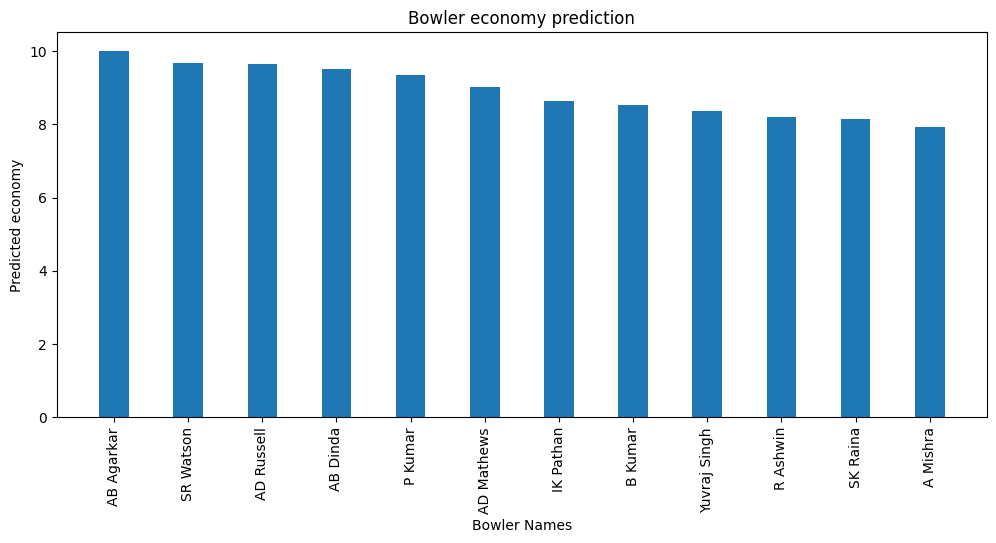

In [111]:
predict_bowler(['SK Raina','Yuvraj Singh','SR Watson', 'P Kumar','R Ashwin','IK Pathan','A Mishra','AB Agarkar', 'AB Dinda','AD Mathews', 'AD Russell', 'B Kumar'])